In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
random_state = 42
tf.random.set_seed(random_state)
n_features = 5

In [3]:
rfe_sel = ['P_VSA_MR_5', 'Mor22s', 'Mor04m', 'LUMO / eV', 'E1p', 'HOMO / eV', 'P_VSA_LogP_2', 'Mor29v', 'MATS5v',
           'Mor14s', 'Mor14u', 'CATS3D_02_AP', 'GATS5v', 'MATS5m', 'GATS2s', 'Mor32m', 'H3m', 'TDB04s', 'E2s', 'R5p+',
           'R2e+', 'ISH', 'DISPm', 'R5i+', 'Mor04i', 'Ds', 'Mor03s', 'E2m', 'Mor28s', 'Mor11u', 'TDB03m', 'Mor19m',
           'VE2sign_G', 'SpMAD_RG', 'R3s+', 'R5e+', 'E2v', 'Mor15i', 'T(N..O)', 'R2u+', 'MATS8p', 'Eta_epsi_5',
           'MATS4s', 'H0v', 'Hy', 'E1i', 'VE1sign_G', 'Mor15s', 'E3e', 'Mor13u', 'Eig03_AEA(dm)', 'X4Av', 'P_VSA_e_3',
           'Mor29e', 'Mor16m', 'GATS5m', 'E3p', 'E2e', 'X3Av', 'Mor19u', 'GATS4s', 'E3v', 'TDB04m']

In [4]:
data = pd.read_csv('..\\Data\\ze41_mol_desc_db_red.csv', header=0, sep=';', decimal=',')

In [5]:
col_names = data.columns
X = data[rfe_sel[:n_features]].astype('float32')
#X = data[col_names[3:]].astype('float32')
y = data[col_names[1]].astype('float32')

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=random_state)
[X_train, X_valid, y_train, y_valid] = [pd.DataFrame(x) for x in [X_train, X_valid, y_train, y_valid]]

In [7]:
scalex = MinMaxScaler(feature_range=(-1,1))
scalex.fit(X_train)
[X_train_sc, X_valid_sc] = [pd.DataFrame(scalex.transform(x), columns=X.columns) for x in [X_train, X_valid]]

In [8]:
scaley = MinMaxScaler(feature_range=(0, 1))
scaley.fit(y_train)
[y_train_sc, y_valid_sc] = [pd.DataFrame(scaley.transform(y), columns=y.columns) for y in [y_train, y_valid]]

In [9]:
class Autoencoder(keras.models.Model):
    def __init__(self, latent_dim=2):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            #keras.layers.Dense(100, activation='linear'),
            #keras.layers.LeakyReLU(),
            keras.layers.Dense(10, activation='linear'),
            keras.layers.LeakyReLU(),
            keras.layers.Dense(latent_dim, activation='linear'),
            keras.layers.LeakyReLU(),
        ])
        self.decoder = tf.keras.Sequential([
            keras.layers.Dense(10, activation='linear'),
            keras.layers.LeakyReLU(),
            #keras.layers.Dense(100, activation='linear'),
            #keras.layers.LeakyReLU(),
            keras.layers.Dense(len(X_train.columns), activation='linear')
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [10]:
autoencoder = Autoencoder(latent_dim=2)

In [11]:
autoencoder.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error')

In [12]:
history = autoencoder.fit(X_train_sc, X_train_sc, validation_data=(X_valid_sc, X_valid_sc), epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 55ms/step - loss: 0.3568 - val_loss: 0.4309
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 0.3024 - val_loss: 0.3936
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 0.2778 - val_loss: 0.3680
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 0.2588 - val_loss: 0.3410
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 0.2376 - val_loss: 0.3136
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 0.2171 - val_loss: 0.2848
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 0.1951 - val_loss: 0.2552
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 0.1749 - val_loss: 0.2256
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 0.1581 - val_loss: 0.1968
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 0.1433 - val_loss: 0.1713
Epoch 11/100
2/2 [==========

2/2 [==============================] - 0s 8ms/step - loss: 0.0752 - val_loss: 0.0552
Epoch 85/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0752 - val_loss: 0.0532
Epoch 86/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0749 - val_loss: 0.0520
Epoch 87/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0748 - val_loss: 0.0511
Epoch 88/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0746 - val_loss: 0.0511
Epoch 89/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0743 - val_loss: 0.0517
Epoch 90/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0743 - val_loss: 0.0525
Epoch 91/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0741 - val_loss: 0.0523
Epoch 92/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0739 - val_loss: 0.0513
Epoch 93/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0737 - val_loss: 0.0495
Epoch 94/100
2/2 [==============

In [13]:
encoded = autoencoder.encoder(X_valid_sc.to_numpy()).numpy()

In [14]:
np.min(encoded, axis=0), np.mean(encoded, axis=0), np.max(encoded, axis=0)

(array([ 0.9758228, -0.5559894], dtype=float32),
 array([1.8607202 , 0.19837685], dtype=float32),
 array([2.5644338, 1.022274 ], dtype=float32))

In [15]:
np.where(np.all(np.isclose(encoded, 0), axis=0))[0]

array([], dtype=int64)

In [16]:
encoded

array([[ 0.9758228 ,  0.90623355],
       [ 1.9118326 , -0.05084479],
       [ 2.5644338 ,  1.022274  ],
       [ 1.8481774 , -0.03094987],
       [ 2.2689097 , -0.5559894 ],
       [ 1.5951439 , -0.10046242]], dtype=float32)

In [17]:
encoded.shape

(6, 2)

In [18]:
enc_train = autoencoder.encoder(X_train_sc.to_numpy()).numpy()

In [19]:
enc_train.shape

(54, 2)

In [20]:
X_v_enc = pd.DataFrame(encoded, columns=['enc_dim_1', 'enc_dim_2'], index=X_valid.index)

In [21]:
X_t_enc = pd.DataFrame(enc_train, columns=['enc_dim_1', 'enc_dim_2'], index=X_train.index)

In [22]:
X_enc = X_t_enc.append(X_v_enc)

In [23]:
data[X_enc.columns] = X_enc.sort_index()

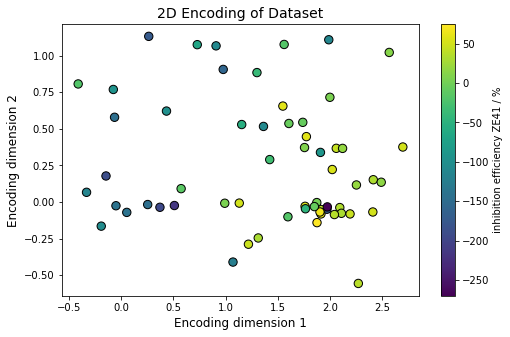

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
data.plot.scatter(x='enc_dim_1', y='enc_dim_2', c = 'inhibition efficiency ZE41 / %', ax=ax, colormap='viridis',
                  s=70, edgecolors='black')
ax.set_title('2D Encoding of Dataset', fontsize=14)
ax.set_xlabel('Encoding dimension 1', fontsize=12)
ax.set_ylabel('Encoding dimension 2', fontsize=12)
#fig.get_axes()[1].tick_params(labelsize=15) 
plt.savefig('..\\figures\\autoencoder.svg', format='svg')
plt.show()

In [25]:
data.head()

,compound,inhibition efficiency ZE41 / %,LinIE ZE41,MW,AMW,Mv,Mi,nTA,RBF,nDB,...,CATS3D_04_LL,CATS3D_05_LL,HOMO / eV,LUMO / eV,Hlgap / eV,Cv / kJ/(mol-K)@293.15K,Cp / kJ/(mol-K)@293.15K,chem_pot / kJ/mol@293.15K,enc_dim_1,enc_dim_2
0,3-Amino-124-triazole,-157,0.328,84.10,8.410,0.609,1.199,1.0,0.000,0.0,...,0.0,0.0,-5.422,0.078,5.500,0.074309,0.082623,127.67,0.975823,0.906234
1,3-methylcatechol,-31,0.693,124.15,7.303,0.620,1.122,3.0,0.000,0.0,...,1.0,0.0,-5.311,-0.184,5.127,0.135196,0.143511,269.94,1.420936,0.290214
2,3-methylsalicylicacid,75,1.000,152.16,8.008,0.645,1.120,4.0,0.053,1.0,...,1.0,0.0,-5.870,-1.812,4.058,0.151551,0.159865,296.04,1.873397,-0.140466
3,4-aminosalicylicacid,57,0.948,153.15,8.508,0.653,1.132,4.0,0.056,1.0,...,0.0,0.0,-5.545,-1.331,4.215,0.152926,0.161240,267.85,1.911016,-0.081023
4,4-hydroxybenzoicacid,-170,0.290,138.13,8.633,0.670,1.117,3.0,0.063,1.0,...,0.0,0.0,-6.198,-1.472,4.726,0.132298,0.140612,225.54,1.968321,-0.048982


In [26]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation='relu', input_shape=(len(X.columns),)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1)
])

In [27]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error')

In [28]:
dec_train = autoencoder.decoder(enc_train)
dec_valid = autoencoder.decoder(encoded)

In [29]:
#[dec_train, dec_valid] = [pd.DataFrame(x, columns = X.columns) for x in [dec_train, dec_valid]]
#[dec_train, dec_valid] = [np.asarray(x).astype('float32') for x in [dec_train, dec_valid]]

In [30]:
history = model.fit(dec_train, y_train_sc, validation_data=(dec_valid, y_valid_sc), epochs=25)

Epoch 1/25
2/2 [==============================] - 0s 47ms/step - loss: 0.4766 - val_loss: 0.2135
Epoch 2/25
2/2 [==============================] - 0s 8ms/step - loss: 0.1731 - val_loss: 0.0382
Epoch 3/25
2/2 [==============================] - 0s 8ms/step - loss: 0.0585 - val_loss: 0.2058
Epoch 4/25
2/2 [==============================] - 0s 8ms/step - loss: 0.1172 - val_loss: 0.0864
Epoch 5/25
2/2 [==============================] - 0s 8ms/step - loss: 0.0526 - val_loss: 0.0133
Epoch 6/25
2/2 [==============================] - 0s 8ms/step - loss: 0.0425 - val_loss: 0.0134
Epoch 7/25
2/2 [==============================] - 0s 8ms/step - loss: 0.0564 - val_loss: 0.0188
Epoch 8/25
2/2 [==============================] - 0s 8ms/step - loss: 0.0593 - val_loss: 0.0142
Epoch 9/25
2/2 [==============================] - 0s 8ms/step - loss: 0.0512 - val_loss: 0.0090
Epoch 10/25
2/2 [==============================] - 0s 8ms/step - loss: 0.0417 - val_loss: 0.0145
Epoch 11/25
2/2 [=====================

In [31]:
grid_x = np.linspace(X_enc['enc_dim_1'].min(), X_enc['enc_dim_1'].max(), 101)
grid_y = np.linspace(X_enc['enc_dim_2'].min(), X_enc['enc_dim_2'].max(), 101)
#grid_coords = np.linspace(-1, 1, 101)
xv, yv = np.meshgrid(grid_x, grid_y)

In [32]:
positions = np.transpose(np.vstack([xv.ravel(), yv.ravel()]))

In [33]:
grid_dec = autoencoder.decoder(positions)
grid_pred = model.predict(grid_dec)
grid_pred = scaley.inverse_transform(grid_pred)

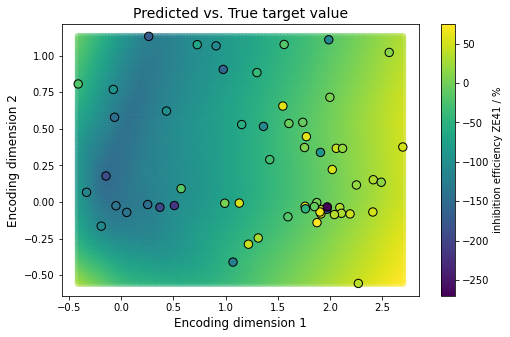

In [34]:
fig, ax = plt.subplots(figsize=(8,5))
p1 = ax.scatter(xv.ravel(), yv.ravel(), c=grid_pred, alpha=0.5, vmin=-270, vmax=75)
data.plot.scatter(x='enc_dim_1', y='enc_dim_2', c = 'inhibition efficiency ZE41 / %', ax=ax,
                  colormap='viridis', edgecolors='black', s=70)
ax.set_title('Predicted vs. True target value', fontsize=14)
ax.set_xlabel('Encoding dimension 1', fontsize=12)
ax.set_ylabel('Encoding dimension 2', fontsize=12)
#cax = plt.gcf().get_axes()[1]
#cax.set_label('Inhibition efficiency', size=12)
plt.savefig('..\\figures\\contour.svg', format='svg')
plt.show()

In [62]:
diffs = []
for i in range(60):
    enc1 = data.iloc[i]['enc_dim_1']
    enc2 = data.iloc[i]['enc_dim_2']
    valt = data.iloc[i]['inhibition efficiency ZE41 / %']
    c1 = np.where(grid_x >= enc1)[0][0]
    c2 = np.where(grid_y >= enc2)[0][0]
    valp = grid_pred.reshape(101,-1)[c1, c2]
    diffs.append([data.iloc[i]['compound'], valt, np.round(valp, 0), np.round(np.abs(valt-valp), 0),
                  np.round(enc1, 3), np.round(enc2, 3)])


In [63]:
diffs = pd.DataFrame(diffs, columns = ['compound', 'True', 'Predicted', 'Diff', 'enc1', 'enc2'])

In [64]:
diffs.sort_values(by='Diff')

,compound,True,Predicted,Diff,enc1,enc2
36,maleicacid,12,22.0,10.0,2.564,1.022
15,ascorbicacid,6,-9.0,15.0,1.997,0.716
38,mandelicacid,-6,-29.0,23.0,1.737,0.545
41,nta,-124,-147.0,23.0,1.069,-0.410
17,asparticacid,-54,-30.0,24.0,1.153,0.530
27,formicacid,-5,-30.0,25.0,1.604,0.537
24,cysteine,-104,-78.0,26.0,-0.191,-0.164
53,salicylaldoxime,-89,-58.0,31.0,1.906,0.339
1,3-methylcatechol,-31,-62.0,31.0,1.421,0.290
30,glutamicaicd,-139,-94.0,45.0,0.053,-0.071


In [66]:
diffs.sort_values(by='enc1')

,compound,True,Predicted,Diff,enc1,enc2
25,diethylentriamine,-18,38.0,56.0,-0.412,0.807
35,lysine,-113,-59.0,54.0,-0.332,0.067
24,cysteine,-104,-78.0,26.0,-0.191,-0.164
16,asparagine,-188,-54.0,134.0,-0.146,0.178
59,urea,-93,22.0,115.0,-0.076,0.769
49,piperazine,-145,-3.0,142.0,-0.064,0.579
40,norleucine,-138,-84.0,54.0,-0.050,-0.025
30,glutamicaicd,-139,-94.0,45.0,0.053,-0.071
46,phenylalanine,-146,-94.0,52.0,0.253,-0.017
14,55-dimethylhydation,-172,58.0,230.0,0.263,1.132
